<a href="https://colab.research.google.com/github/charann90/Mobile-Price-Range-Prediction/blob/main/Mobile_price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Price Range Prediction
> Predicting mobile price range based on its features set.



# Business Context

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.

The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price.

In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# Dataset Description


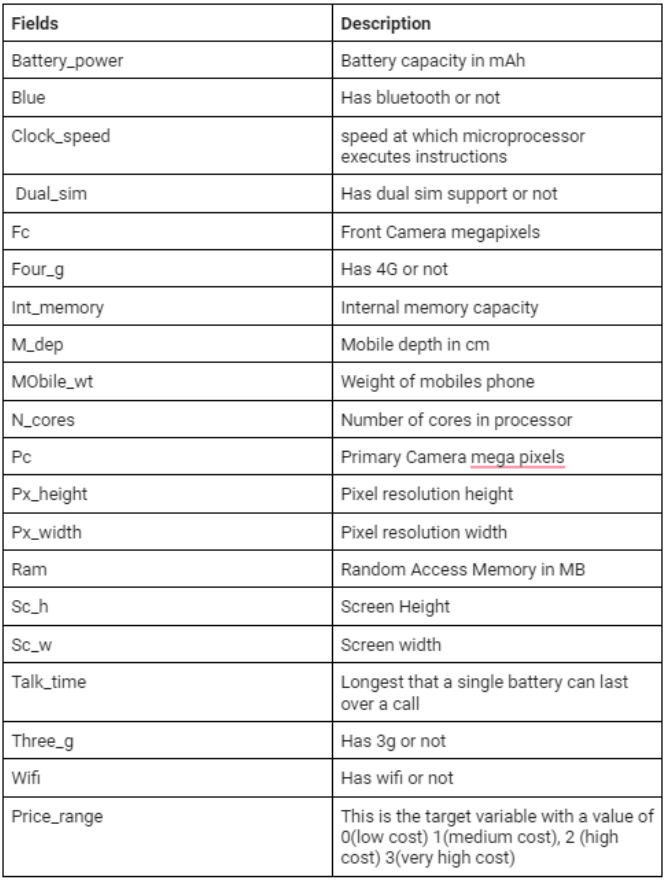

# Libraries

In [5]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
import warnings

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

# Data uploading

In [9]:
df=pd.read_csv('/content/data_mobile_price_range.csv')

In [10]:
df.head().T

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


# Data Wrangling

In [11]:
#checking null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

The dataset has no null values

In [12]:
#checking the data type of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# EDA

In [13]:
df['price_range'].unique()

array([1, 2, 3, 0])

In [14]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

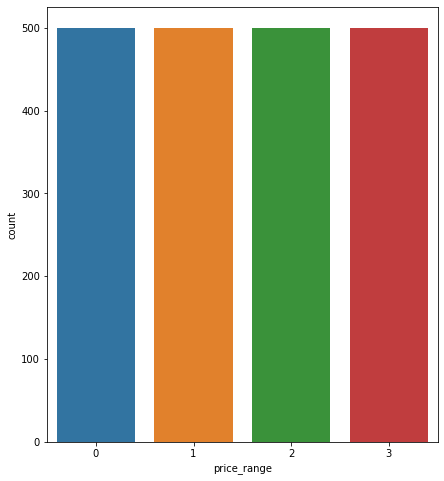

In [15]:
plt.figure(figsize=(7,8))
sns.countplot(df['price_range'])

We have equal frequencies of all the price range

In [16]:
list(df.columns.values)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

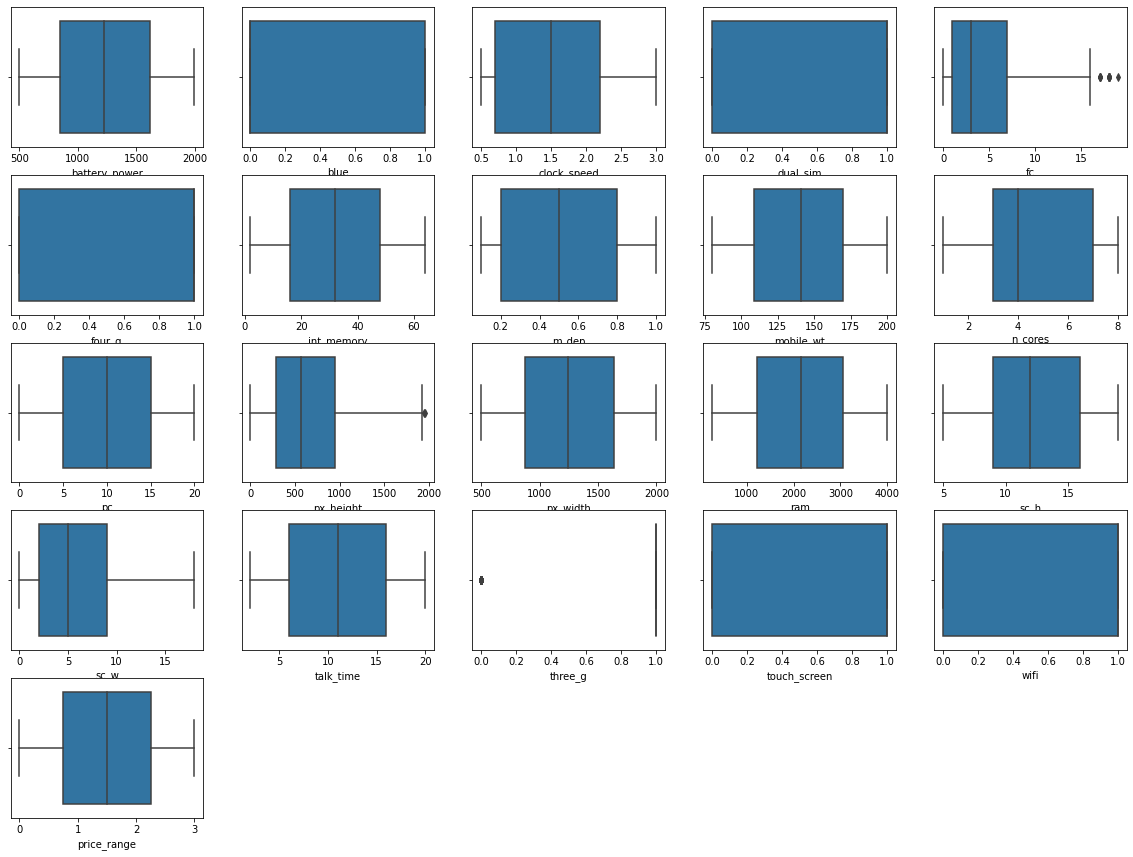

In [17]:
#looking for outliers
plt.figure(figsize=(20,18))
for index, i in enumerate(list(df.columns.values)):
  plt.subplot(6,5,index+1)
  sns.boxplot(df[i])
  


There are not much outliers

In [18]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [19]:
df['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

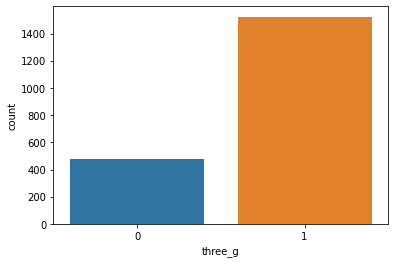

In [20]:
sns.countplot(df['three_g'])

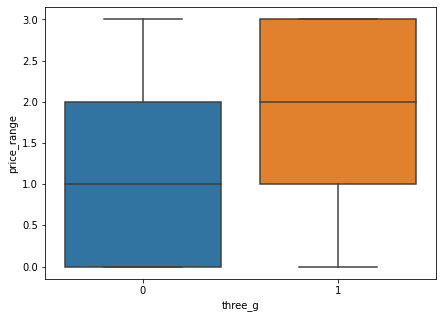

In [21]:
plt.figure(figsize=(7,5))
sns.boxplot(y=df['price_range'], x = df['three_g'])

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


here both px_height and sc_w has zero values, so there is a need of replacing or droping the zero values 

In [23]:
df['px_height'][df[df['px_height']==0].index]=df['px_height'].mean()
df['sc_w'][df[df['sc_w']==0].index]=df['sc_w'].mean()

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.000,1615.25,1998.0
blue,2000.0,0.495000,0.500100,0.0,0.00,0.000,1.00,1.0
clock_speed,2000.0,1.522250,0.816004,0.5,0.70,1.500,2.20,3.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.00,1.000,1.00,1.0
fc,2000.0,4.309500,4.341444,0.0,1.00,3.000,7.00,19.0
four_g,2000.0,0.521500,0.499662,0.0,0.00,1.000,1.00,1.0
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.000,48.00,64.0
m_dep,2000.0,0.501750,0.288416,0.1,0.20,0.500,0.80,1.0
mobile_wt,2000.0,140.249000,35.399655,80.0,109.00,141.000,170.00,200.0
n_cores,2000.0,4.520500,2.287837,1.0,3.00,4.000,7.00,8.0


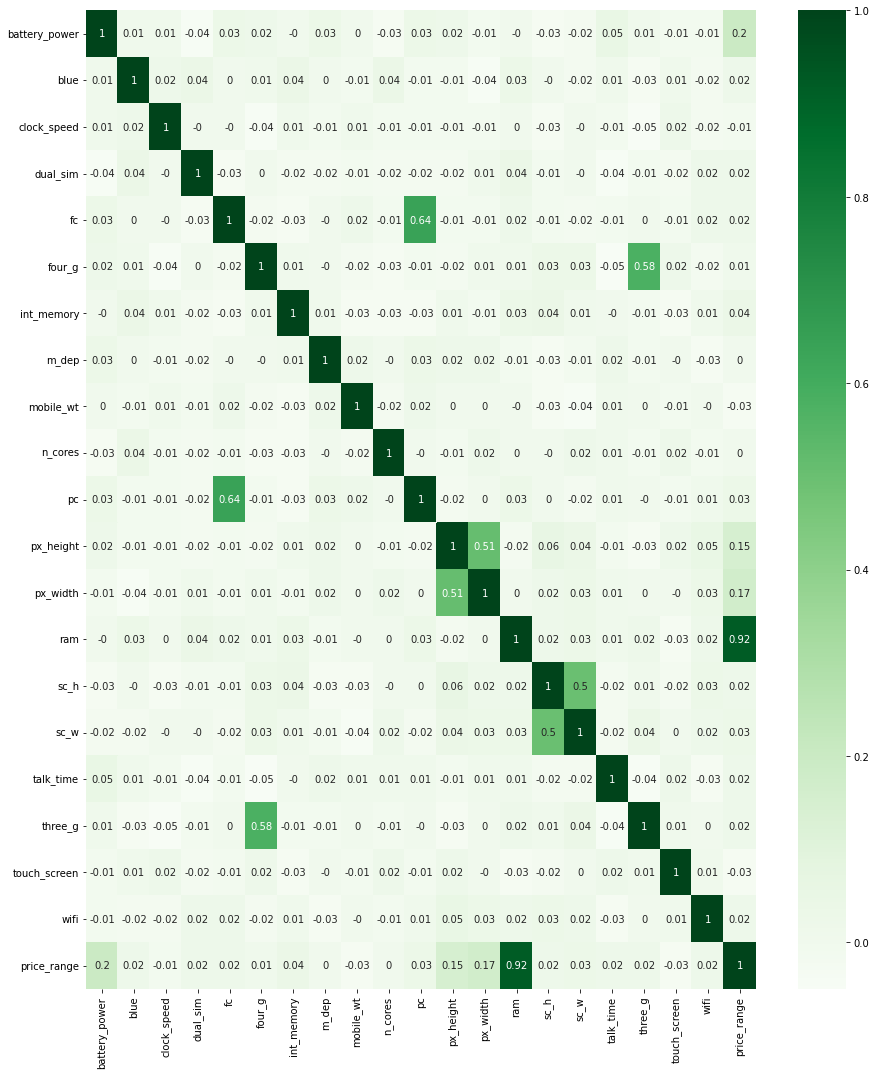

In [26]:
plt.figure(figsize=(15,18))
sns.heatmap(round(df.corr(),2),cmap='Greens',annot=True)

Here Ram has highest correlation with price range. So except 'battery_power,'px_height','px_width','ram'and binary value columns, we can drop the remaining fetures as the dependency of pricing is least on other factors.

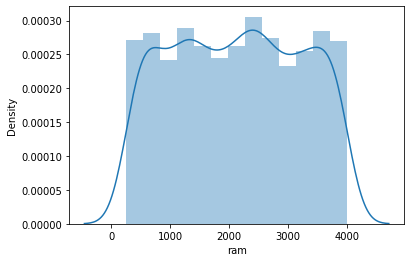

In [25]:
sns.distplot(df['ram'])

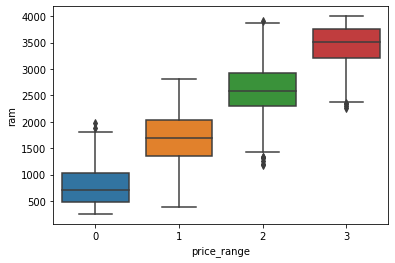

In [27]:
sns.boxplot(x='price_range', y='ram', data=df)

In [29]:
numeric_features = df.describe().columns

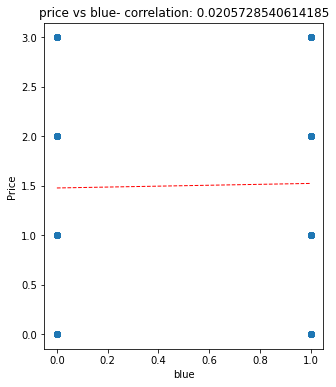

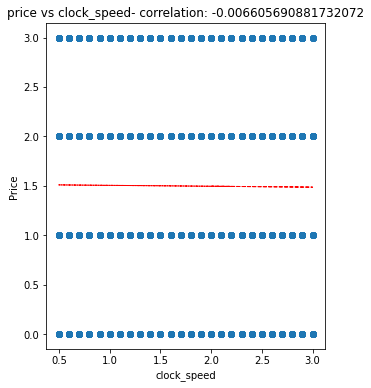

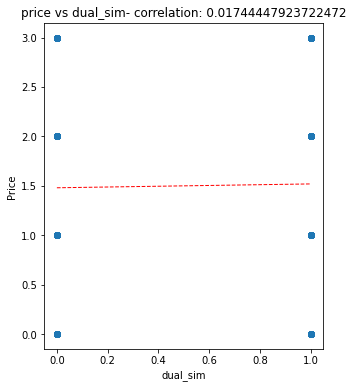

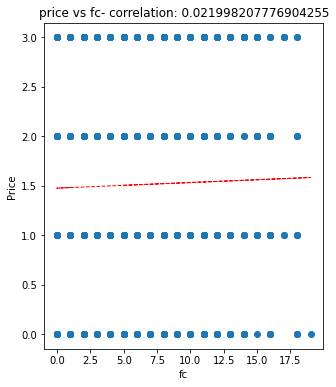

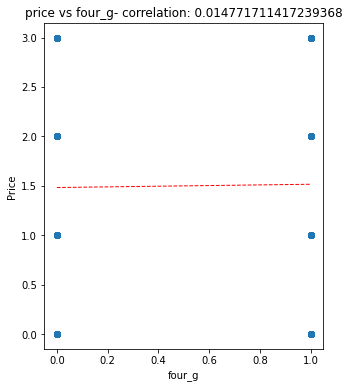

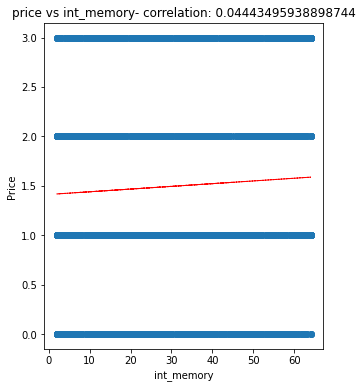

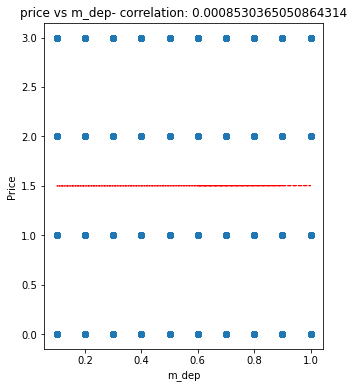

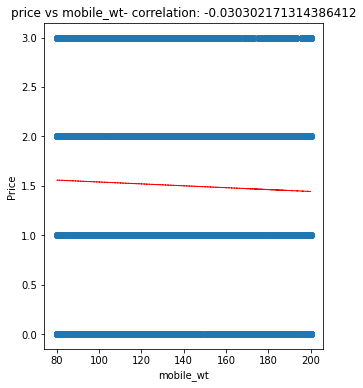

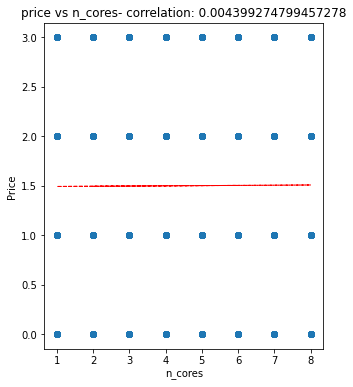

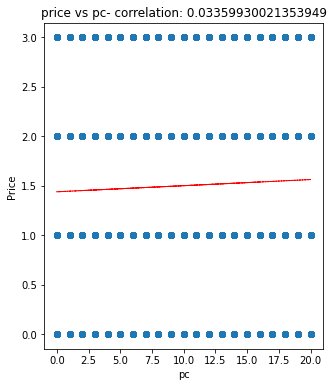

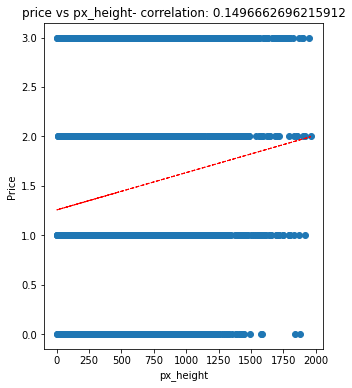

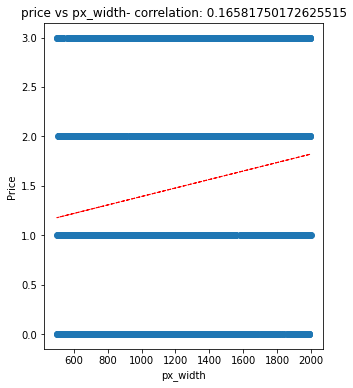

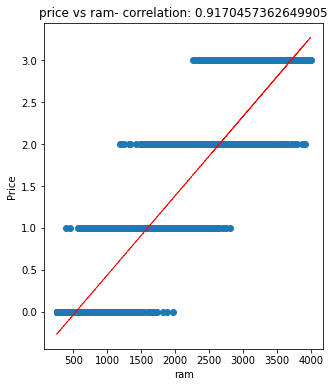

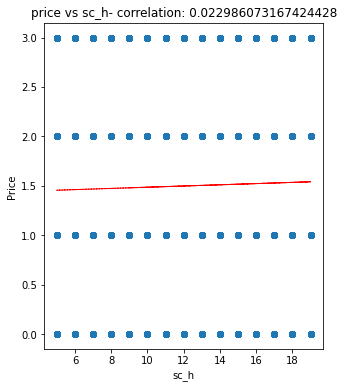

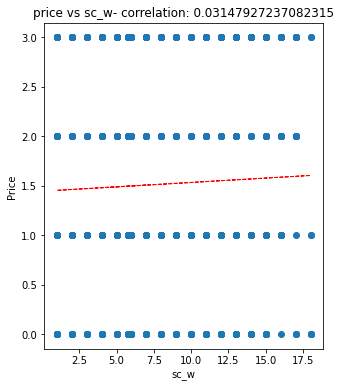

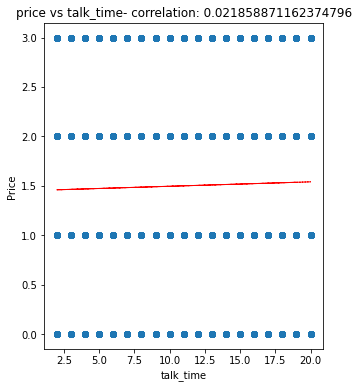

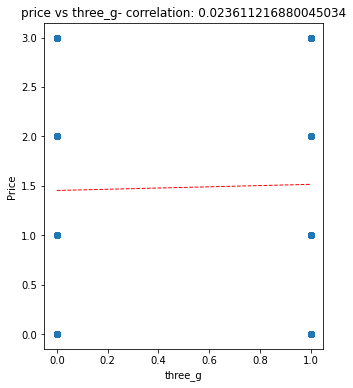

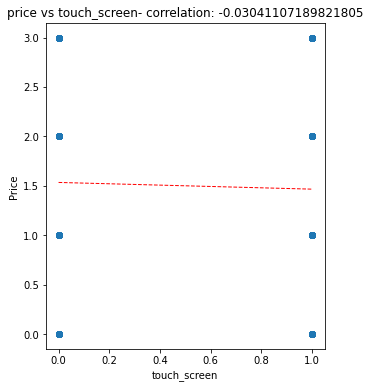

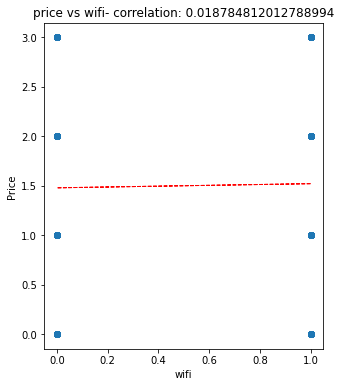

In [30]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(5,6))
    ax = fig.gca()
    feature = df[col]
    i = df['price_range']
    correlation = feature.corr(i)
    plt.scatter(x=feature, y=i)
    plt.xlabel(col)
    plt.ylabel('Price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['price_range'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

Plotting all the categorical features with price range

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(y=df['price_range'], x = df['blue'])



In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(y=df['price_range'], x = df['wifi'])

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(y=df['price_range'], x = df['dual_sim'])

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(y=df['price_range'], x = df['three_g'])

# Machine Learning

In [31]:
#converting screen width and height to scr_dmi
df['scr_dmi']=round(df['sc_h']*df['sc_w'],1)
df.drop(['sc_h','sc_w'],axis=1,inplace=True)

In [32]:
#converting pixel width and height to PPI.
df['ppi']=round(df['px_height']*df['px_width'],1)
df.drop(['px_height','px_width'],axis=1,inplace=True)

In [33]:
y=df['price_range']
x=df.drop(['price_range'],axis=1)

In [34]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=42)

scaler = StandardScaler()
scale=scaler.fit(x_train)
x_train_scaled=scale.transform(x_train)
x_test_scaled=scale.transform(x_test)

In [35]:
x_train.shape

(1600, 18)

In [37]:
x_test.shape

(400, 18)

# logistic regression

In [36]:
clf= LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(x_train_scaled,y_train)

LogisticRegression(max_iter=10000)

In [38]:
importances = pd.DataFrame(data={'Attribute': x_train.columns,
                                'Importance': clf.coef_[0]
})
#sorting dataframe by descending value of coefficients
importances = importances.sort_values(by='Importance', ascending=True)

In [39]:
importances

,Attribute,Importance
11,ram,-10.499555
0,battery_power,-2.627274
17,ppi,-2.510231
13,three_g,-0.128982
6,int_memory,-0.096808
4,fc,-0.092582
16,scr_dmi,-0.085076
10,pc,-0.069503
9,n_cores,-0.051443
12,talk_time,-0.020099


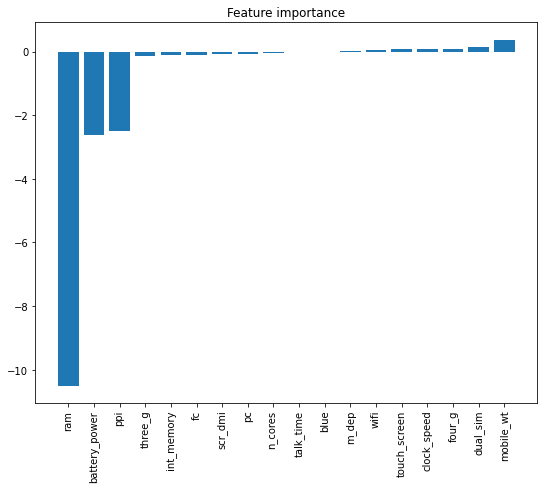

In [40]:
#Visualising feature importance by their coefficient values
plt.figure(figsize=(9,7))
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importance')
plt.xticks(rotation=90)
plt.show()

In [41]:
df.drop(['blue','m_dep','touch_screen','wifi'],axis=1,inplace=True)

In [ ]:
y=df['price_range']
x=df.drop(['price_range'],axis=1)

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=42)

scaler = StandardScaler()
scale=scaler.fit(x_train)
x_train_scaled=scale.transform(x_train)
x_test_scaled=scale.transform(x_test)

In [ ]:
clf= LogisticRegression(fit_intercept=True, max_iter=10000,solver="liblinear")
clf.fit(x_train_scaled,y_train)

In [42]:
test_class_pred=clf.predict(x_test_scaled)
train_class_pred=clf.predict(x_train_scaled)

In [43]:
test_class_pred[:10]

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1])

In [44]:
y_test[:10]

1860    0
353     2
1333    1
905     3
1289    1
1273    1
938     2
1731    0
65      3
1323    1
Name: price_range, dtype: int64

In [45]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.945
The accuracy on test data is  0.925


[[101   4   0   0]
 [  3  84   4   0]
 [  0   5  80   7]
 [  0   0   7 105]]


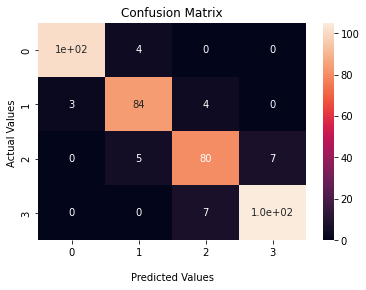

In [46]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, test_class_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True)
labels = ['0', '1', '2', '3']

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

[[386   9   0   0]
 [ 12 381  16   0]
 [  0  18 374  16]
 [  0   0  17 371]]


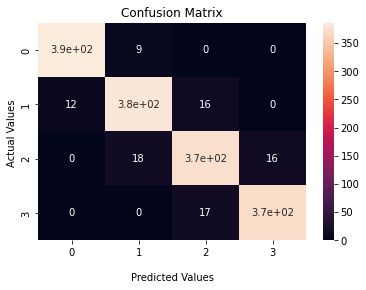

In [47]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_train, train_class_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True)
labels = ['0', '1', '2', '3']

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

In [48]:
print(classification_report(y_test,test_class_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       105
           1       0.90      0.92      0.91        91
           2       0.88      0.87      0.87        92
           3       0.94      0.94      0.94       112

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.93      0.93      0.93       400



In [49]:
print(classification_report(y_train,train_class_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       395
           1       0.93      0.93      0.93       409
           2       0.92      0.92      0.92       408
           3       0.96      0.96      0.96       388

    accuracy                           0.94      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.94      0.94      0.94      1600



# Cross validation and hyperparameter tuning on Logistic Regression

In [50]:
#Tuning parameters 
param_grid = [    
    {'penalty' : ['l1', 'l2', 'none'],
    'C' : [1.0, 0.1],
    'solver' : ['newton-cg','liblinear'],
    'max_iter' : [10, 50, 100,1000]
    }
]


In [51]:
#Parameter fitted into GridSearch 
log_clf = GridSearchCV(clf, param_grid = param_grid, cv =3, verbose=True, n_jobs=-1, scoring='accuracy', error_score=0)

In [52]:
best_clf=log_clf.fit(x_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [53]:
best_clf.best_estimator_

LogisticRegression(max_iter=1000, penalty='none', solver='newton-cg')

In [54]:
best_clf.best_params_

{'C': 1.0, 'max_iter': 1000, 'penalty': 'none', 'solver': 'newton-cg'}

In [55]:
best_clf.best_score_

0.9268772851946324

In [56]:
cv_accuracy= cross_val_score(best_clf, x_train, y_train,scoring='accuracy',cv=5)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [57]:
print(f'accuracy of model with cross validation is {cv_accuracy[0]}')

accuracy of model with cross validation is 0.9375


# Random forest classifier

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=42)

scaler = StandardScaler()
scale=scaler.fit(x_train)
x_train_scaled=scale.transform(x_train)
x_test_scaled=scale.transform(x_test)

In [59]:
clf1= RandomForestClassifier()
clf1.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [60]:
test_class_pred=clf1.predict(x_test_scaled)
train_class_pred=clf1.predict(x_train_scaled)

In [61]:
test_class_pred[:10]

array([0, 2, 1, 3, 1, 2, 2, 0, 3, 1])

In [62]:
y_test[:10]

1860    0
353     2
1333    1
905     3
1289    1
1273    1
938     2
1731    0
65      3
1323    1
Name: price_range, dtype: int64

In [63]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  1.0
The accuracy on test data is  0.8625


[[101   4   0   0]
 [  7  76   8   0]
 [  0   9  75   8]
 [  0   0  19  93]]


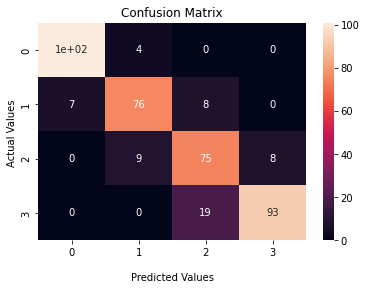

In [64]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, test_class_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True)
labels = ['0', '1', '2', '3']

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

[[395   0   0   0]
 [  0 409   0   0]
 [  0   0 408   0]
 [  0   0   0 388]]


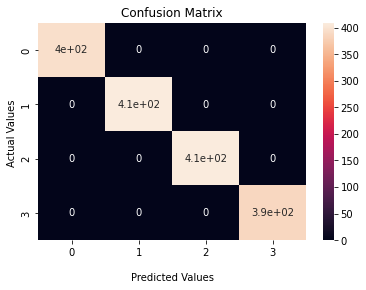

In [65]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_train, train_class_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True)
labels = ['0', '1', '2', '3']

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

In [66]:
print(classification_report(y_test,test_class_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.85      0.84      0.84        91
           2       0.74      0.82      0.77        92
           3       0.92      0.83      0.87       112

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



In [67]:
print(classification_report(y_train,train_class_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



# Cross validation and hyperparameter tuning on Random Forest Classifier

Tuning

In [ ]:
from sklearn.pipeline import make_pipeline


In [ ]:
pipelineRFC = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='gini', random_state=1))

In [68]:
# Number of trees
n_estimators = [50,80,100]
max_depth = [4,6,8]
min_samples_split = [50,100,150]
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [69]:
# Grid search
rf_grid = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy', verbose=2)

In [70]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=50)

In [71]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 50}

In [72]:
rf_grid.best_score_

0.8225

Cross validation

In [73]:
cv_accuracy= cross_val_score(rf_grid, x_train, y_train,scoring='accuracy',cv=5)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_sam

In [74]:
print(f'accuracy of model with Random tree classifier is {cv_accuracy[0]}')

accuracy of model with Random tree classifier is 0.815625


# SVM

In [75]:
svm_model=SVC()
svm_model.fit(x_train_scaled,y_train)

SVC()

In [76]:
test_class_pred=svm_model.predict(x_test_scaled)
train_class_pred=svm_model.predict(x_train_scaled)

In [77]:
test_class_pred[:10]

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1])

In [78]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.973125
The accuracy on test data is  0.87


[[98  7  0  0]
 [ 7 77  7  0]
 [ 0 11 76  5]
 [ 0  0 15 97]]


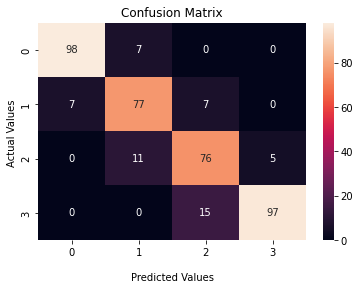

In [79]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, test_class_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True)
labels = ['0', '1', '2', '3']

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

[[388   7   0   0]
 [  4 401   4   0]
 [  0  10 396   2]
 [  0   0  16 372]]


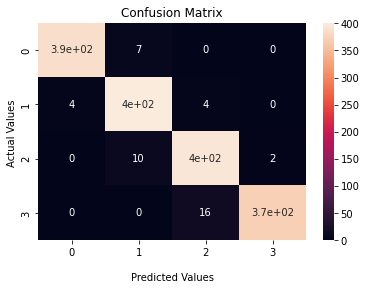

In [80]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_train, train_class_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True)
labels = ['0', '1', '2', '3']

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

In [81]:
print(classification_report(y_test,test_class_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       105
           1       0.81      0.85      0.83        91
           2       0.78      0.83      0.80        92
           3       0.95      0.87      0.91       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [82]:
print(classification_report(y_train,train_class_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       395
           1       0.96      0.98      0.97       409
           2       0.95      0.97      0.96       408
           3       0.99      0.96      0.98       388

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



# Cross validation and hyperparameter tuning on SVM

In [83]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svm_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2)

In [84]:
svm_grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.2s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [85]:
svm_grid.best_estimator_

SVC(C=100, gamma=0.01, kernel='sigmoid')

In [86]:
svm_grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}

In [87]:
svm_grid.best_score_

0.9200000000000002

In [88]:
test_grid_predictions = svm_grid.predict(x_test_scaled)

In [89]:
train_grid_predictions = svm_grid.predict(x_train_scaled)

In [90]:
print(classification_report(y_test,test_grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.89      0.90      0.90        91
           2       0.87      0.86      0.86        92
           3       0.94      0.94      0.94       112

    accuracy                           0.92       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.92      0.92      0.92       400



In [91]:
print(classification_report(y_train,train_grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       395
           1       0.90      0.90      0.90       409
           2       0.88      0.88      0.88       408
           3       0.94      0.94      0.94       388

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



In [92]:
cv_accuracy= cross_val_score(svm_grid, x_train_scaled, y_train,scoring='accuracy',cv=5)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, k

In [98]:
print(f'accuracy of model with Random tree classifier is {cv_accuracy[0]}')

accuracy of model with Random tree classifier is 0.9125


# Decision tree 

In [93]:
clf= DecisionTreeRegressor()
clf.fit(x_train_scaled,y_train)

DecisionTreeRegressor()

In [94]:
test_class_pred=clf.predict(x_test_scaled)
train_class_pred=clf.predict(x_train_scaled)

In [95]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  1.0
The accuracy on test data is  0.855


In [96]:
print(classification_report(y_test,test_class_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       105
           1       0.79      0.82      0.81        91
           2       0.80      0.75      0.78        92
           3       0.89      0.91      0.90       112

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [97]:
print(classification_report(y_train,train_class_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



# Cross validation and hyperparameter tuning on Decision tree regression

In [104]:
from sklearn.pipeline import Pipeline


In [121]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini","entropy"]
}

In [122]:
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params,return_train_score=True,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(x_train_scaled,y_train)